In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats
from matplotlib.ticker import ScalarFormatter


In [3]:
data = pd.read_csv('data/search.csv', encoding='euc-kr')
data.tail()

,순위,광역시/도,시/군/구,관광지명,검색건수,기준년도,지정년도,지정구분
33,18.0,경상북도,칠곡군,국립칠곡숲체원,5381.0,2223,2023,전
34,189.0,인천광역시,중구,현대요트인천지점,324.0,2223,2023,전
35,168.0,인천광역시,중구,현대요트인천지점,542.0,2324,2023,후
36,42.0,충청북도,제천시,국립제천치유의숲,2303.0,2223,2023,전
37,36.0,충청북도,제천시,국립제천치유의숲,2272.0,2324,2023,후


In [4]:
data[['순위', '검색건수']] = data[['순위', '검색건수']].astype("Int64")
data

,순위,광역시/도,시/군/구,관광지명,검색건수,기준년도,지정년도,지정구분
0,2,강원특별자치도,원주시,오크밸리CC,86108,2324,2024,전
1,2,강원특별자치도,원주시,오크밸리CC,78334,2425,2024,후
2,<NA>,인천광역시,강화군,금풍양조장,<NA>,2324,2024,전
3,<NA>,인천광역시,강화군,금풍양조장,<NA>,2425,2024,후
4,10,충청북도,영동군,레인보우힐링센터,5053,2425,2024,후
5,12,충청북도,영동군,레인보우힐링센터,3436,2324,2024,전
6,17,경기도,양평군,미리내힐빙클럽,10665,2425,2024,후
7,19,경기도,양평군,미리내힐빙클럽,9531,2324,2024,전
8,<NA>,대구광역시,수성구,한국전통문화체험관,<NA>,2425,2024,후
9,<NA>,대구광역시,수성구,한국전통문화체험관,<NA>,2324,2024,전


In [5]:
# 필요한 열만 선택
df = data[["관광지명", '순위', '검색건수', '기준년도', '지정년도', '지정구분']]

# 전/후 데이터 분리
df_before = df[df['지정구분'] == '전'].rename(columns={'순위': '순위_전'})
df_after = df[df['지정구분'] == '후'].rename(columns={'순위': '순위_후'})

# 관광지명 + 지정년도 기준으로 merge
merged = pd.merge(df_before, df_after, on=['관광지명', '지정년도'], how='inner')

# 순위 변화 계산 (음수면 순위 상승, 양수면 하락)
merged['순위변화'] = merged['순위_전'] - merged['순위_후']

# 결과 정렬 (예: 순위 상승이 큰 순)
merged_sorted = merged.sort_values(by='순위변화', ascending=False)

# 상위 일부 확인
merged_sorted[['관광지명', '지정년도', '순위_전', '순위_후', '순위변화']]


,관광지명,지정년도,순위_전,순위_후,순위변화
9,JW메리어트제주,2024,61,26,35
17,현대요트인천지점,2023,189,168,21
14,하이힐링원,2023,56,38,18
15,숲애서,2023,88,70,18
18,국립제천치유의숲,2023,42,36,6
6,클럽디오아시스,2024,22,18,4
13,삼척활기자연휴양림,2023,41,37,4
8,쉴랜드,2024,16,13,3
16,국립칠곡숲체원,2023,18,15,3
2,레인보우힐링센터,2024,12,10,2


- 웰니스 관광 지정 이후 순위가 올라간 것을 확인할 수 있음.
- 다만 이게 웰니스 관광 지정의 독립적인 효과인지 아닌지에 대해서 확인할 수 있는 데이터는 없음.
- 웰니스 지정이 어느 정도 효과가 있었다고 추측하는 수밖에 없음.
- NA는 값이 없었던 것
- 웰니스 관광 지정 이후 관심은 대체로 상승한 것을 확인할 수 있음.
- 다만 이게 실제 방문까지 이어지지는 않았다는 것
 

In [6]:
# 순위 확인
# 데이터 전처리
df2 = data[['광역시/도', '관광지명', '지정년도', '지정구분', '순위', '검색건수']].copy()
df2.head()

# 정수형으로 변환 (NaN 처리 가능한 Int64 사용)
df2['순위'] = df2['순위'].astype('Int64')
df2['검색건수'] = df2['검색건수'].astype('Int64')
df2.info()

# '전' / '후'로 나누기
before = df2[df2['지정구분'] == '전'].rename(columns={
     '순위': '순위_전',
     '검색건수': '검색건수_전'
})

after = df2[df2['지정구분'] == '후'].rename(columns={
     '순위': '순위_후',
     '검색건수': '검색건수_후'})

# 관광지명 + 지정년도 + 광역시/도 기준으로 병합
merged = pd.merge(
     before, after,
     on=['광역시/도', '관광지명', '지정년도'],
     how='inner')

# 변화량 계산
merged['순위변화'] = merged['순위_전'] - merged['순위_후']
merged['검색건수변화'] = merged['검색건수_후'] - merged['검색건수_전']

# 광역시/도별 집계
grouped_region = merged.groupby('광역시/도').agg(
     관광지수=('관광지명', 'count'),
     평균순위변화=('순위변화', 'mean'),
     평균검색건수변화=('검색건수변화', 'mean')).sort_values(by='평균검색건수변화', ascending=False).reset_index()

 # 결과 출력
grouped_region['평균순위변화'] = grouped_region['평균순위변화'].astype('Int64')
grouped_region['평균검색건수변화'] = grouped_region['평균검색건수변화'].astype('Int64')
grouped_region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시/도   38 non-null     object
 1   관광지명    38 non-null     object
 2   지정년도    38 non-null     int64 
 3   지정구분    38 non-null     object
 4   순위      30 non-null     Int64 
 5   검색건수    30 non-null     Int64 
dtypes: Int64(2), int64(1), object(3)
memory usage: 2.0+ KB


,광역시/도,관광지수,평균순위변화,평균검색건수변화
0,부산광역시,1,4,5035
1,제주특별자치도,2,-5,2989
2,대구광역시,2,1,1735
3,경상북도,2,3,1146
4,경기도,1,2,1134
5,경상남도,1,18,794
6,충청북도,2,4,793
7,전북특별자치도,1,3,565
8,인천광역시,3,10,-1652
9,강원특별자치도,3,7,-2771


- 웰니스 관광지 선정 이후의 평균순위변화로 봤을 때 경상남도가 가장 효과가 많았음. 
- 제주를 제외하고는 대체적으로 상승하는 모습을 확인할 수 있었음.

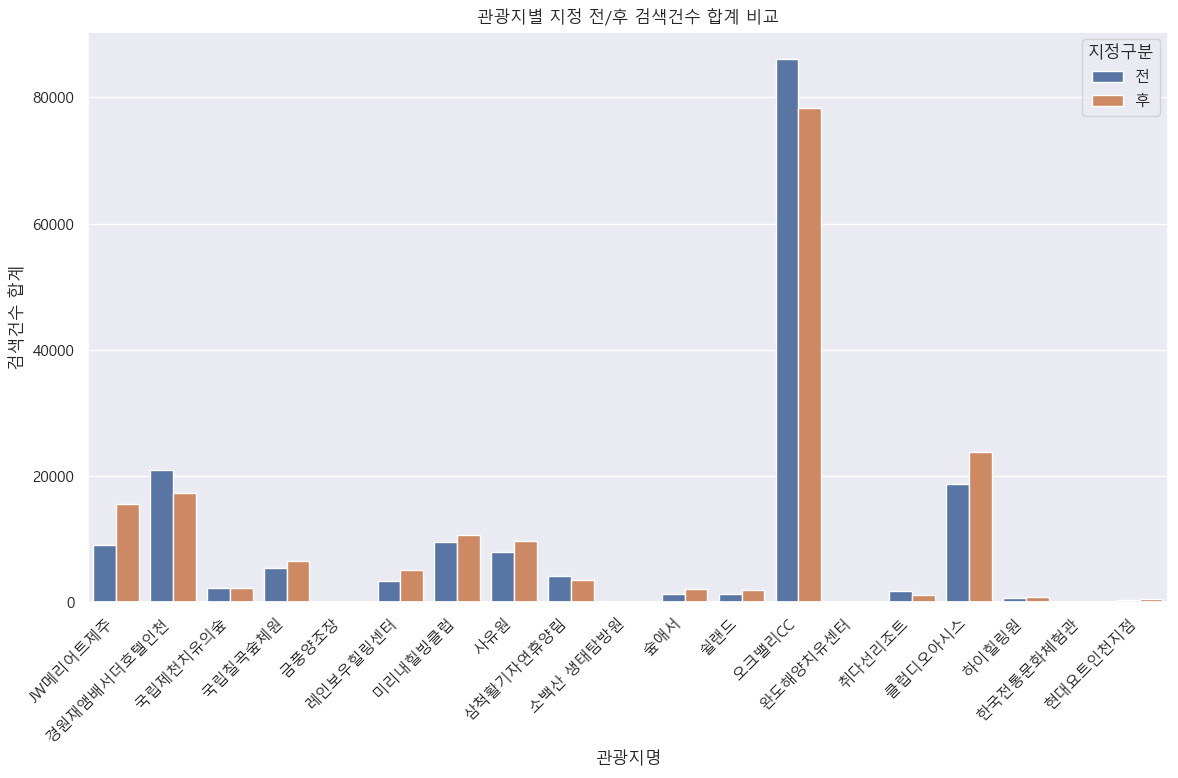

In [7]:
# 1) 기준 전/후별로 관광지명과 검색건수 합계 집계
agg_data = data.groupby(['관광지명', '지정구분'])['검색건수'].sum().reset_index()

# 2) seaborn 막대그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(data=agg_data, x='관광지명', y='검색건수', hue='지정구분')

plt.title('관광지별 지정 전/후 검색건수 합계 비교')
plt.xlabel('관광지명')
plt.ylabel('검색건수 합계')
plt.xticks(rotation=45, ha='right')
plt.legend(title='지정구분')
plt.tight_layout()
plt.show()


In [8]:
# 기준 전/후별 관광지별 검색건수 합계 계산
agg_table = data.groupby(['관광지명', '지정구분'])['검색건수'].sum().unstack()

# 컬럼 이름이 '전', '후'로 나누어짐
agg_table = agg_table.rename(columns={'전': '검색건수_전', '후': '검색건수_후'})

# 결측치가 있으면 0으로 채우기 (예: 지정 전/후 중 없는 경우)
agg_table = agg_table.fillna(0).astype(int)

# 검색건수 변화 컬럼 추가
agg_table['검색건수_변화'] = agg_table['검색건수_후'] - agg_table['검색건수_전']

def change_label(x):
    if x > 0:
        return '증가'
    elif x < 0:
        return '감소'
    else:
        return '변화없음'

agg_table['변화상태'] = agg_table['검색건수_변화'].apply(change_label)

# 결과 출력
agg_table.reset_index(inplace=True)
agg_table


지정구분,관광지명,검색건수_전,검색건수_후,검색건수_변화,변화상태
0,JW메리어트제주,9073,15646,6573,증가
1,경원재앰배서더호텔인천,20913,17390,-3523,감소
2,국립제천치유의숲,2303,2272,-31,감소
3,국립칠곡숲체원,5381,6527,1146,증가
4,금풍양조장,0,0,0,변화없음
5,레인보우힐링센터,3436,5053,1617,증가
6,미리내힐빙클럽,9531,10665,1134,증가
7,사유원,7914,9649,1735,증가
8,삼척활기자연휴양림,4196,3499,-697,감소
9,소백산 생태탐방원,0,0,0,변화없음


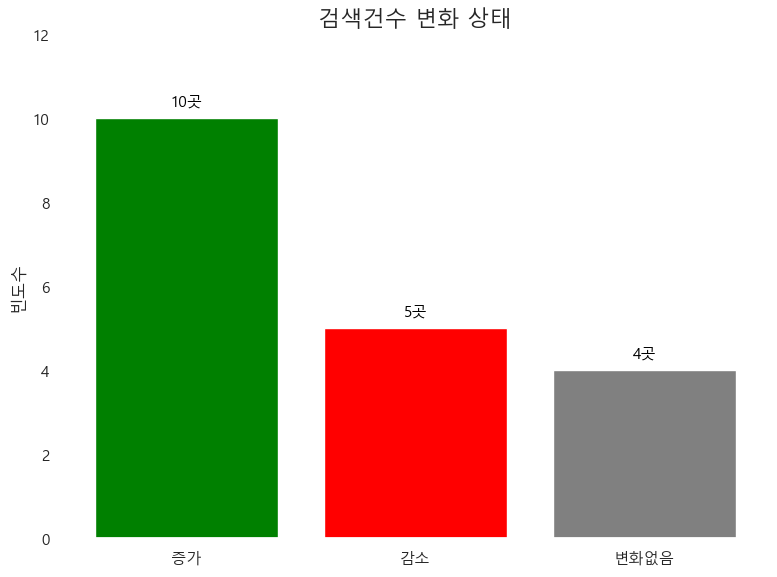

In [9]:
# value_counts 계산
counts = agg_table['변화상태'].value_counts()

# figure와 axes를 명시적으로 생성 + 배경 흰색
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')

# ax의 배경도 흰색으로 설정
ax.set_facecolor('white')

# 막대 그래프 그리기
bars = ax.bar(counts.index, counts.values, color=['green', 'red', 'gray'])

# 제목 및 축 설정
ax.set_title('검색건수 변화 상태', fontsize=16)
ax.set_ylabel('빈도수', fontsize=12)
ax.set_xlabel('')
ax.set_ylim(0, counts.max() + 2)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index, rotation=0)

# 막대 위 숫자 표시
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height + 0.2,
        f'{int(height):,}곳',
        ha='center', va='bottom',
        fontsize=11, color='black'
    )

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from tqdm import tqdm

tqdm.pandas()

# 데이터 불러오기
df = data  # 파일 불러오기 또는 직접 생성

# 검색건수 피벗 (전/후)
pivot = df.pivot_table(
    index='관광지명',
    columns='지정구분',
    values='검색건수',
    aggfunc='first'
).reset_index()

# 변화 상태 정의
def classify_change(row):
    if pd.isna(row.get('전')) or pd.isna(row.get('후')):
        return '알수없음'
    try:
        if row['후'] > row['전']:
            return '증가'
        elif row['후'] < row['전']:
            return '감소'
        else:
            return '변화없음'
    except:
        return '알수없음'

pivot['변화상태'] = pivot.apply(classify_change, axis=1)

# 시군구 병합
loc_info = df[['관광지명', '시/군/구', '광역시/도']].drop_duplicates()
merged = pd.merge(pivot, loc_info, on='관광지명', how='left')

# 좌표 가져오기 (지오코딩)
geolocator = Nominatim(user_agent="wellness_map")
def get_coords(row):
    try:
        query = f"{row['광역시/도']} {row['시/군/구']} {row['관광지명']}"
        location = geolocator.geocode(query)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

merged[['lat', 'lon']] = merged.progress_apply(get_coords, axis=1)

# 지도 초기화
m = folium.Map(location=[36.5, 127.8], zoom_start=7)

# 색상 정의
color_map = {
    '증가': 'red',
    '감소': 'blue',
    '알수없음': 'gray',
    '변화없음': 'lightgray'
}

# 마커 그리기
for _, row in merged.iterrows():
    lat, lon = row['lat'], row['lon']
    if pd.notna(lat) and pd.notna(lon):
        상태 = row['변화상태']
        color = color_map.get(상태, 'black')  # 예외 처리
        popup_text = f"""<b>{row['관광지명']}</b><br>
                        전: {row.get('전', 'N/A')}<br>
                        후: {row.get('후', 'N/A')}<br>
                        상태: {상태}"""
        folium.CircleMarker(
            location=[lat, lon],
            radius=7,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(m)

# 결과 저장
m.save("wellness_map.html")


100%|██████████| 15/15 [00:18<00:00,  1.25s/it]


In [11]:
import pandas as pd
import folium
from folium import CircleMarker
from branca.element import Element
from geopy.geocoders import Nominatim
import time

# -- 1. agg_table, data 가 이미 있다고 가정 --

# 예: agg_table 칼럼 = ['관광지명', '검색건수_전', '검색건수_후', '검색건수_변화', '변화상태']
# data 칼럼 = ['관광지명', '광역시/도', '시/군/구', ...] 원본 전체 데이터

# -- 2. 관광지별 고유 주소 정보 추출 --
place_info = data[['관광지명', '광역시/도', '시/군/구']].drop_duplicates().reset_index(drop=True)

# -- 3. Nominatim 지오코딩 함수 정의 --
geolocator = Nominatim(user_agent="wellness_map")

def get_coords(row):
    query = f"{row['광역시/도']} {row['시/군/구']} {row['관광지명']}"
    try:
        location = geolocator.geocode(query)
        time.sleep(1)  # 요청 간격 최소 1초 권장
        if location:
            return pd.Series([location.latitude, location.longitude])
    except Exception as e:
        print(f"Error geocoding {query}: {e}")
    return pd.Series([None, None])

# -- 4. 자동 위경도 부여 --
place_info[['lat', 'lon']] = place_info.apply(get_coords, axis=1)

# -- 5. 수동 좌표 보완 --
manual_coords = {
    'JW메리어트제주': (33.2470, 126.4170),
    '경원재앰배서더호텔인천': (37.4510, 126.6911),
    '국립제천치유의숲': (37.1497, 128.2135),
    '국립칠곡숲체원': (36.0271, 128.3869),
    '금풍양조장': (37.6884, 126.4770),
    '레인보우힐링센터': (36.1745, 127.7922),
    '미리내힐빙클럽': (37.4836, 127.5115),
    '사유원': (35.9372, 128.6530),
    '삼척활기자연휴양림': (37.4473, 129.1665),
    '소백산 생태탐방원': (36.9453, 128.4977),
    '숲애서': (35.3450, 129.0465),
    '쉴랜드': (35.4169, 127.1573),
    '완도해양치유센터': (34.3293, 126.7570),
    '취다선리조트': (33.2421, 126.5537),
    '클럽디오아시스': (35.1587, 129.1604),
    '하이힐링원': (37.1774, 128.4910),
    '한국전통문화체험관': (35.8506, 128.6230),
    '현대요트인천지점': (37.4742, 126.6235),
}

for name, (lat, lon) in manual_coords.items():
    place_info.loc[place_info['관광지명'] == name, ['lat', 'lon']] = lat, lon

# -- 6. agg_table과 place_info 병합 --
merged = pd.merge(agg_table, place_info, on='관광지명', how='left')

# -- 7. 색상 매핑 함수 --
def get_color(change):
    if change == '증가':
        return 'red'
    elif change == '감소':
        return 'blue'
    else:
        return 'gray'

# -- 8. Folium 지도 생성 --
map_center = [36.5, 127.8]  # 한반도 중심 좌표
m = folium.Map(location=map_center, zoom_start=7)

# -- 9. CircleMarker로 관광지 표시 --
for _, row in merged.iterrows():
    if pd.notna(row['lat']) and pd.notna(row['lon']):
        CircleMarker(
            location=[row['lat'], row['lon']],
            radius=8,
            color=get_color(row['변화상태']),
            fill=True,
            fill_color=get_color(row['변화상태']),
            fill_opacity=0.8,
            popup=folium.Popup(f"{row['관광지명']}<br>변화상태: {row['변화상태']}<br>변화량: {row['검색건수_변화']}", max_width=200)
        ).add_to(m)

# -- 10. 범례 HTML 직접 추가 --
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 150px;
    height: 110px;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    background-color:white;
    padding: 10px;
    ">
<b>변화상태 범례</b><br>
<i style="background:red; border-radius:50%; width:12px; height:12px; display:inline-block;"></i>&nbsp;증가<br>
<i style="background:blue; border-radius:50%; width:12px; height:12px; display:inline-block;"></i>&nbsp;감소<br>
<i style="background:gray; border-radius:50%; width:12px; height:12px; display:inline-block;"></i>&nbsp;변화없음
</div>
"""
from branca.element import Element
legend = Element(legend_html)
m.get_root().html.add_child(legend)

# -- 11. 지도 저장 및 알림 --
m.save("wellness_change_map.html")
print("wellness_change_map.html 파일이 생성되었습니다. 브라우저에서 열어보세요.")


wellness_change_map.html 파일이 생성되었습니다. 브라우저에서 열어보세요.


In [12]:
print(merged[['관광지명', 'lat', 'lon']].isna().sum())
print(merged[merged['lat'].isna()][['관광지명', '광역시/도', '시/군/구']])


관광지명    0
lat     0
lon     0
dtype: int64
Empty DataFrame
Columns: [관광지명, 광역시/도, 시/군/구]
Index: []


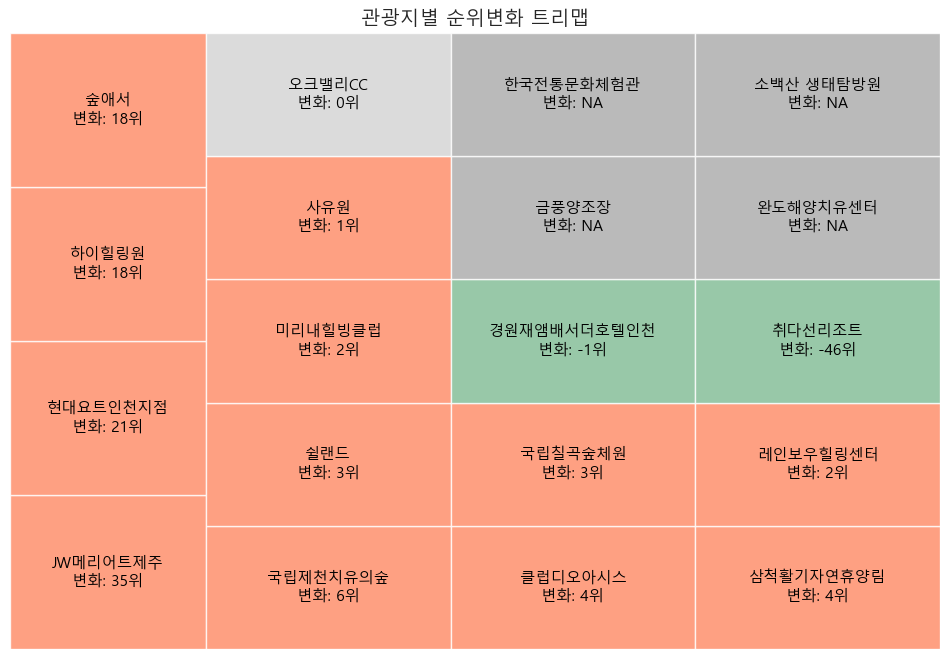

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

data = {
    '관광지명': ['JW메리어트제주', '현대요트인천지점', '하이힐링원', '숲애서', '국립제천치유의숲', '클럽디오아시스', 
               '삼척활기자연휴양림', '쉴랜드', '국립칠곡숲체원', '레인보우힐링센터', '미리내힐빙클럽', '사유원', 
               '오크밸리CC', '경원재앰배서더호텔인천', '취다선리조트', '금풍양조장', '한국전통문화체험관', 
               '완도해양치유센터', '소백산 생태탐방원'],
    '순위변화': [35, 21, 18, 18, 6, 4, 4, 3, 3, 2, 2, 1, 0, -1, -46, None, None, None, None]
}

df = pd.DataFrame(data)

# 색상 매핑 함수
def get_color(x):
    if pd.isna(x):
        return '#A9A9A9'  # 진한 회색
    elif x > 0:
        return '#FE8863'  # 파스텔 레드
    elif x < 0:
        return '#7FBB92'  # 파스텔 초록
    else:
        return '#D3D3D3'  # 연한 회색

colors = df['순위변화'].apply(get_color)

# 라벨 처리: 소수점 제거 + "위" 붙이기
def format_label(name, change):
    if pd.isna(change):
        return f"{name}\n변화: NA"
    else:
        return f"{name}\n변화: {int(change)}위"

labels = [
    format_label(name, change)
    for name, change in zip(df['관광지명'], df['순위변화'])
]

# 트리맵 그리기
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=[1]*len(df),
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'color': 'black', 'fontsize': 11}
)

plt.axis('off')
plt.title('관광지별 순위변화 트리맵', fontsize=14)
plt.show()
